In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import math
from mpl_toolkits.axes_grid1 import make_axes_locatable

# STO simulation data part

## Load raw data, denoised data, and truth

In [5]:
path = 'D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseOutput_cropped/STO/'

raw_data = sio.loadmat('D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseInput_cropped/\
STO/Simulation_noisy_STO_slice_5_1000FPS_cropped_100layers.mat')
raw_data = raw_data['datacube']

truth_data = np.load('D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseInput_cropped/\
STO/Simulation_truth_STO_slice_5_1000FPS_cropped_100layers.npy')

tensor_denoised = sio.loadmat(path + 'Simulation_tensor_STO_slice_5_1000FPS_cropped_100layers.mat')
tensor_denoised = tensor_denoised['est_HOOI']

NLPCA_denoised = sio.loadmat(path + 'Simulation_NLPCA_STO_slice_5_1000FPS_cropped_100layers.mat')
NLPCA_denoised = NLPCA_denoised['est_NLPCA']

BM4D_denoised = sio.loadmat(path + 'Simulation_BM4D_STO_slice_5_1000FPS_cropped_100layers.mat')
BM4D_denoised = BM4D_denoised['est_BM4D']

PCA_denoised = path + 'Simulation_PCA_STO_slice_5_1000FPS_cropped_100layers.npy'
PCA_denoised = np.load(PCA_denoised)

## Calculate PSNR for three methods under different frame rates

In [6]:
# Plot input vs output psnr
FPS_list = [1000,2000,4000,6000,8000,10000,20000,40000]
PSNR_list = np.zeros((6,len(FPS_list)))
path = 'D:/2020/TensorSVD/ManuscriptRelated/SimulationData/'
for i in range(len(FPS_list)):
    FPS = FPS_list[i]
    truth_file = path + 'DenoiseInput_cropped/STO/Simulation_truth_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.npy'
    truth_file = np.load(truth_file)
    
    noisy_file = path + 'DenoiseInput_cropped/STO/Simulation_noisy_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    noisy_file = sio.loadmat(noisy_file)
    noisy_file = noisy_file['datacube']
    
    tensor_file = path + 'DenoiseOutput_cropped/STO/Simulation_tensor_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    tensor_file = sio.loadmat(tensor_file)
    tensor_file = tensor_file['est_HOOI']
    
    NLPCA_file = path + 'DenoiseOutput_cropped/STO/Simulation_NLPCA_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    NLPCA_file = sio.loadmat(NLPCA_file)
    NLPCA_file = NLPCA_file['est_NLPCA']
    
    BM4D_file = path + 'DenoiseOutput_cropped/STO/Simulation_BM4D_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    BM4D_file = sio.loadmat(BM4D_file)
    BM4D_file = BM4D_file['est_BM4D']
    
    tensor_file_optimized = path + 'DenoiseOutput_cropped/STO/Simulation_tensor_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers_optimized.mat'
    tensor_file_optimized = sio.loadmat(tensor_file_optimized)
    tensor_file_optimized = tensor_file_optimized['est_HOOI']
    
    PCA_file = path + 'DenoiseOutput_cropped/STO/Simulation_PCA_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.npy'
    PCA_file = np.load(PCA_file)
    
    PSNR_list[0,i] = averagePSNR(tensor_file,truth_file,0)
    PSNR_list[1,i] = averagePSNR(NLPCA_file,truth_file,0)
    PSNR_list[2,i] = averagePSNR(BM4D_file,truth_file,0)
    PSNR_list[3,i] = averagePSNR(noisy_file,truth_file,0)
    PSNR_list[4,i] = averagePSNR(tensor_file_optimized, truth_file, 0)
    PSNR_list[5,i] = averagePSNR(PCA_file, truth_file, 0)

    
    print(FPS)
    print(PSNR_list[:,i])

1000
[38.09424202 37.02989815 28.72857773 13.79448768 39.0653481  25.61579626]
2000
[36.19586053 34.59476173 25.88558532 10.78946685 36.58854385 22.98119415]
4000
[34.18042908 32.18542403 23.29223818  7.77969859 34.18042908 20.17149271]
6000
[32.6260035  30.33267963 21.85858672  6.02372421 32.6260035  18.44328591]
8000
[31.67351117 28.78548936 20.91711674  4.78197595 31.67351117 17.0633494 ]
10000
[30.77791913 28.15958308 20.12486381  3.81396345 30.77791913 16.18017424]
20000
[27.55322967 25.42280943 17.48046813  0.83202644 27.55546323 13.06560201]
40000
[24.23794666 23.14076714 12.51644178 -2.13467046 25.08191624 10.09287778]


Text(0.5, 1.0, 'STO data')

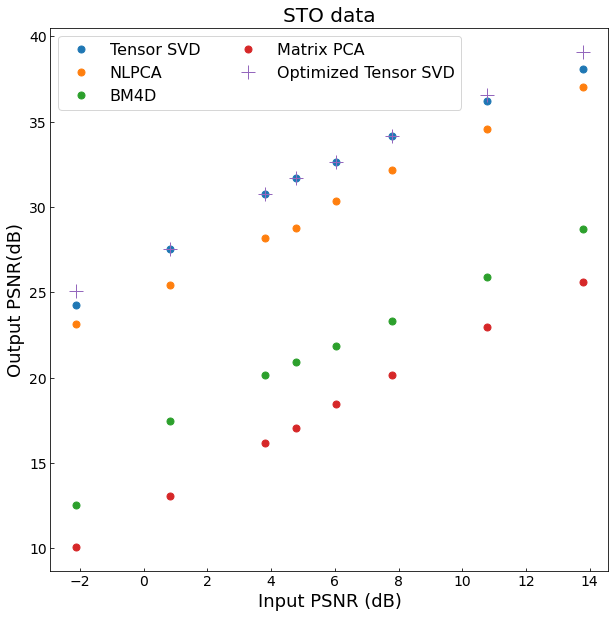

In [7]:
fig = plt.figure(figsize=(10,10))
ax3 = plt.subplot(111)
ax3.plot(PSNR_list[3,:], PSNR_list[0,:], '.',markersize=14, label = 'Tensor SVD')
ax3.plot(PSNR_list[3,:], PSNR_list[1,:], '.',markersize=14, label = 'NLPCA')
ax3.plot(PSNR_list[3,:], PSNR_list[2,:], '.',markersize=14, label = 'BM4D')
ax3.plot(PSNR_list[3,:], PSNR_list[5,:], '.',markersize=14, label = 'Matrix PCA')
ax3.plot(PSNR_list[3,:], PSNR_list[4,:], '+', markersize=14, label = 'Optimized Tensor SVD')
plt.xlabel('Input PSNR (dB)',fontsize=18)
plt.ylabel('Output PSNR(dB)',fontsize=18)
plt.legend(fontsize=16, loc='upper left',ncol=2)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,fontsize=16)
ax3.tick_params(direction='in',labelsize = 14)
plt.title('STO data', fontsize=20)
# ax3.text(15,17,'v',fontsize=45, color='black', fontweight='bold')
# ax3.text(6,17,'Si dislocation data denoise',fontsize=20, color='black')
# plt.ylim([15,40])

## Test different noise metrics, see if the same trend is observed
1. SSIM: using the function skimage.measure.compare_ssim
2. MSE: directly use mean square error in unit of intensity, without normalizing.

In [36]:
# Plot input vs output psnr
FPS_list = [1000,2000,4000,6000,8000,10000,20000,40000]
SSIM_list = np.zeros((6,len(FPS_list)))
path = 'D:/2020/TensorSVD/ManuscriptRelated/SimulationData/'
for i in range(len(FPS_list)):
    FPS = FPS_list[i]
    truth_file = path + 'DenoiseInput_cropped/STO/Simulation_truth_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.npy'
    truth_file = np.load(truth_file)
    
    noisy_file = path + 'DenoiseInput_cropped/STO/Simulation_noisy_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    noisy_file = sio.loadmat(noisy_file)
    noisy_file = noisy_file['datacube']
    
    tensor_file = path + 'DenoiseOutput_cropped/STO/Simulation_tensor_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    tensor_file = sio.loadmat(tensor_file)
    tensor_file = tensor_file['est_HOOI']
    
    NLPCA_file = path + 'DenoiseOutput_cropped/STO/Simulation_NLPCA_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    NLPCA_file = sio.loadmat(NLPCA_file)
    NLPCA_file = NLPCA_file['est_NLPCA']
    
    BM4D_file = path + 'DenoiseOutput_cropped/STO/Simulation_BM4D_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    BM4D_file = sio.loadmat(BM4D_file)
    BM4D_file = BM4D_file['est_BM4D']
    
    tensor_file_optimized = path + 'DenoiseOutput_cropped/STO/Simulation_tensor_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers_optimized.mat'
    tensor_file_optimized = sio.loadmat(tensor_file_optimized)
    tensor_file_optimized = tensor_file_optimized['est_HOOI']
    
    PCA_file = path + 'DenoiseOutput_cropped/STO/Simulation_PCA_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.npy'
    PCA_file = np.load(PCA_file)
    
    SSIM_list[0,i] = averageSSIM(tensor_file,truth_file)
    SSIM_list[1,i] = averageSSIM(NLPCA_file,truth_file)
    SSIM_list[2,i] = averageSSIM(BM4D_file,truth_file)
    SSIM_list[3,i] = averageSSIM(noisy_file,truth_file)
    SSIM_list[4,i] = averageSSIM(tensor_file_optimized, truth_file)
    SSIM_list[5,i] = averageSSIM(PCA_file, truth_file)

    
    print(FPS)
    print(SSIM_list[:,i])

C:\Users\Chenyu\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:14: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  
C:\Users\Chenyu\Anaconda3\lib\site-packages\skimage\measure\_structural_similarity.py:17: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  **kwargs)


1000
[0.99083373 0.9887275  0.94000586 0.33856904 0.99294392 0.90627312]
2000
[0.98757249 0.98039392 0.89499698 0.21126606 0.98863133 0.84377453]
4000
[0.98163594 0.96730694 0.82247189 0.12132375 0.98163594 0.74518631]
6000
[0.97666655 0.95535058 0.77040787 0.08720685 0.97666655 0.66700661]
8000
[0.9734019  0.93852089 0.73273476 0.06872096 0.9734019  0.60196389]
10000
[0.96776314 0.93267484 0.70398746 0.05742729 0.96776314 0.54903156]
20000
[0.95129084 0.9105843  0.63681268 0.03675512 0.95548256 0.42529212]
40000
[0.9404341  0.90971191 0.49597692 0.03227293 0.95488829 0.39036489]


Text(0.5, 1.0, 'STO data')

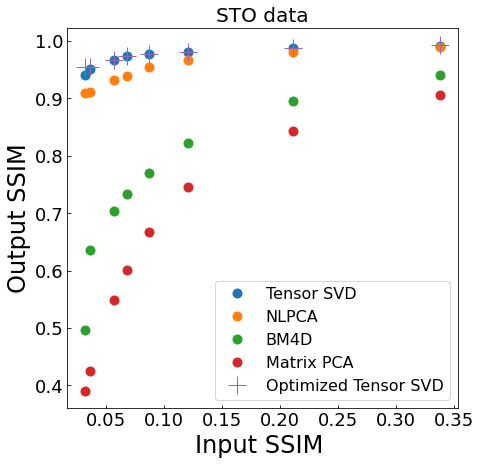

In [38]:
fig = plt.figure(figsize=(7,7))
ax3 = plt.subplot(111)
ax3.plot(SSIM_list[3,:], SSIM_list[0,:], '.',markersize=18, label = 'Tensor SVD')
ax3.plot(SSIM_list[3,:], SSIM_list[1,:], '.',markersize=18, label = 'NLPCA')
ax3.plot(SSIM_list[3,:], SSIM_list[2,:], '.',markersize=18, label = 'BM4D')
ax3.plot(SSIM_list[3,:], SSIM_list[5,:], '.',markersize=18, label = 'Matrix PCA')
ax3.plot(SSIM_list[3,:], SSIM_list[4,:], '+', markersize=18, label = 'Optimized Tensor SVD')
plt.xlabel('Input SSIM ',fontsize=24)
plt.ylabel('Output SSIM',fontsize=24)
plt.legend(fontsize=16, ncol=1)
ax3.tick_params(direction='in',labelsize = 18)
plt.title('STO data', fontsize=20)

In [39]:
# Plot input vs output psnr
FPS_list = [1000,2000,4000,6000,8000,10000,20000,40000]
MSE_list = np.zeros((6,len(FPS_list)))
path = 'D:/2020/TensorSVD/ManuscriptRelated/SimulationData/'
for i in range(len(FPS_list)):
    FPS = FPS_list[i]
    truth_file = path + 'DenoiseInput_cropped/STO/Simulation_truth_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.npy'
    truth_file = np.load(truth_file)
    
    noisy_file = path + 'DenoiseInput_cropped/STO/Simulation_noisy_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    noisy_file = sio.loadmat(noisy_file)
    noisy_file = noisy_file['datacube']
    
    tensor_file = path + 'DenoiseOutput_cropped/STO/Simulation_tensor_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    tensor_file = sio.loadmat(tensor_file)
    tensor_file = tensor_file['est_HOOI']
    
    NLPCA_file = path + 'DenoiseOutput_cropped/STO/Simulation_NLPCA_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    NLPCA_file = sio.loadmat(NLPCA_file)
    NLPCA_file = NLPCA_file['est_NLPCA']
    
    BM4D_file = path + 'DenoiseOutput_cropped/STO/Simulation_BM4D_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    BM4D_file = sio.loadmat(BM4D_file)
    BM4D_file = BM4D_file['est_BM4D']
    
    tensor_file_optimized = path + 'DenoiseOutput_cropped/STO/Simulation_tensor_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers_optimized.mat'
    tensor_file_optimized = sio.loadmat(tensor_file_optimized)
    tensor_file_optimized = tensor_file_optimized['est_HOOI']
    
    PCA_file = path + 'DenoiseOutput_cropped/STO/Simulation_PCA_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.npy'
    PCA_file = np.load(PCA_file)
    
    MSE_list[0,i] = averageMSE(tensor_file,truth_file,0)
    MSE_list[1,i] = averageMSE(NLPCA_file,truth_file,0)
    MSE_list[2,i] = averageMSE(BM4D_file,truth_file,0)
    MSE_list[3,i] = averageMSE(noisy_file,truth_file,0)
    MSE_list[4,i] = averageMSE(tensor_file_optimized, truth_file,0)
    MSE_list[5,i] = averageMSE(PCA_file, truth_file,0)

    print(FPS)
    print(MSE_list[:,i])

1000
[ 0.0411506   0.05860973  0.39664705 11.84643819  0.03530964  0.80866915]
2000
[0.0156556  0.02598525 0.19608953 5.93212819 0.01576851 0.38814063]
4000
[0.00629971 0.01109623 0.09102895 2.96572815 0.00629971 0.18860495]
6000
[0.00412434 0.00795944 0.05691876 1.97913868 0.00412434 0.12748819]
8000
[0.00296544 0.00646923 0.03965458 1.48467718 0.00296544 0.09760895]
10000
[0.00231684 0.00464154 0.03024473 1.18723601 0.00231684 0.07767369]
20000
[0.00128031 0.00227813 0.01345323 0.59301539 0.00121959 0.04046541]
40000
[0.00068017 0.00096162 0.01008198 0.29670993 0.00054902 0.02056214]


Text(0.5, 1.0, 'STO data')

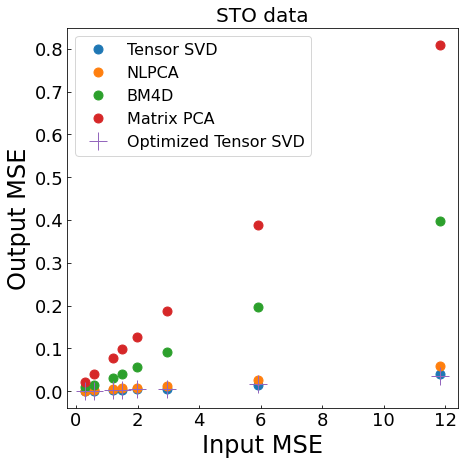

In [40]:
fig = plt.figure(figsize=(7,7))
ax3 = plt.subplot(111)
ax3.plot(MSE_list[3,:], MSE_list[0,:], '.',markersize=18, label = 'Tensor SVD')
ax3.plot(MSE_list[3,:], MSE_list[1,:], '.',markersize=18, label = 'NLPCA')
ax3.plot(MSE_list[3,:], MSE_list[2,:], '.',markersize=18, label = 'BM4D')
ax3.plot(MSE_list[3,:], MSE_list[5,:], '.',markersize=18, label = 'Matrix PCA')
ax3.plot(MSE_list[3,:], MSE_list[4,:], '+', markersize=18, label = 'Optimized Tensor SVD')
plt.xlabel('Input MSE',fontsize=24)
plt.ylabel('Output MSE',fontsize=24)
plt.legend(fontsize=16, ncol=1)
ax3.tick_params(direction='in',labelsize = 18)
plt.title('STO data', fontsize=20)

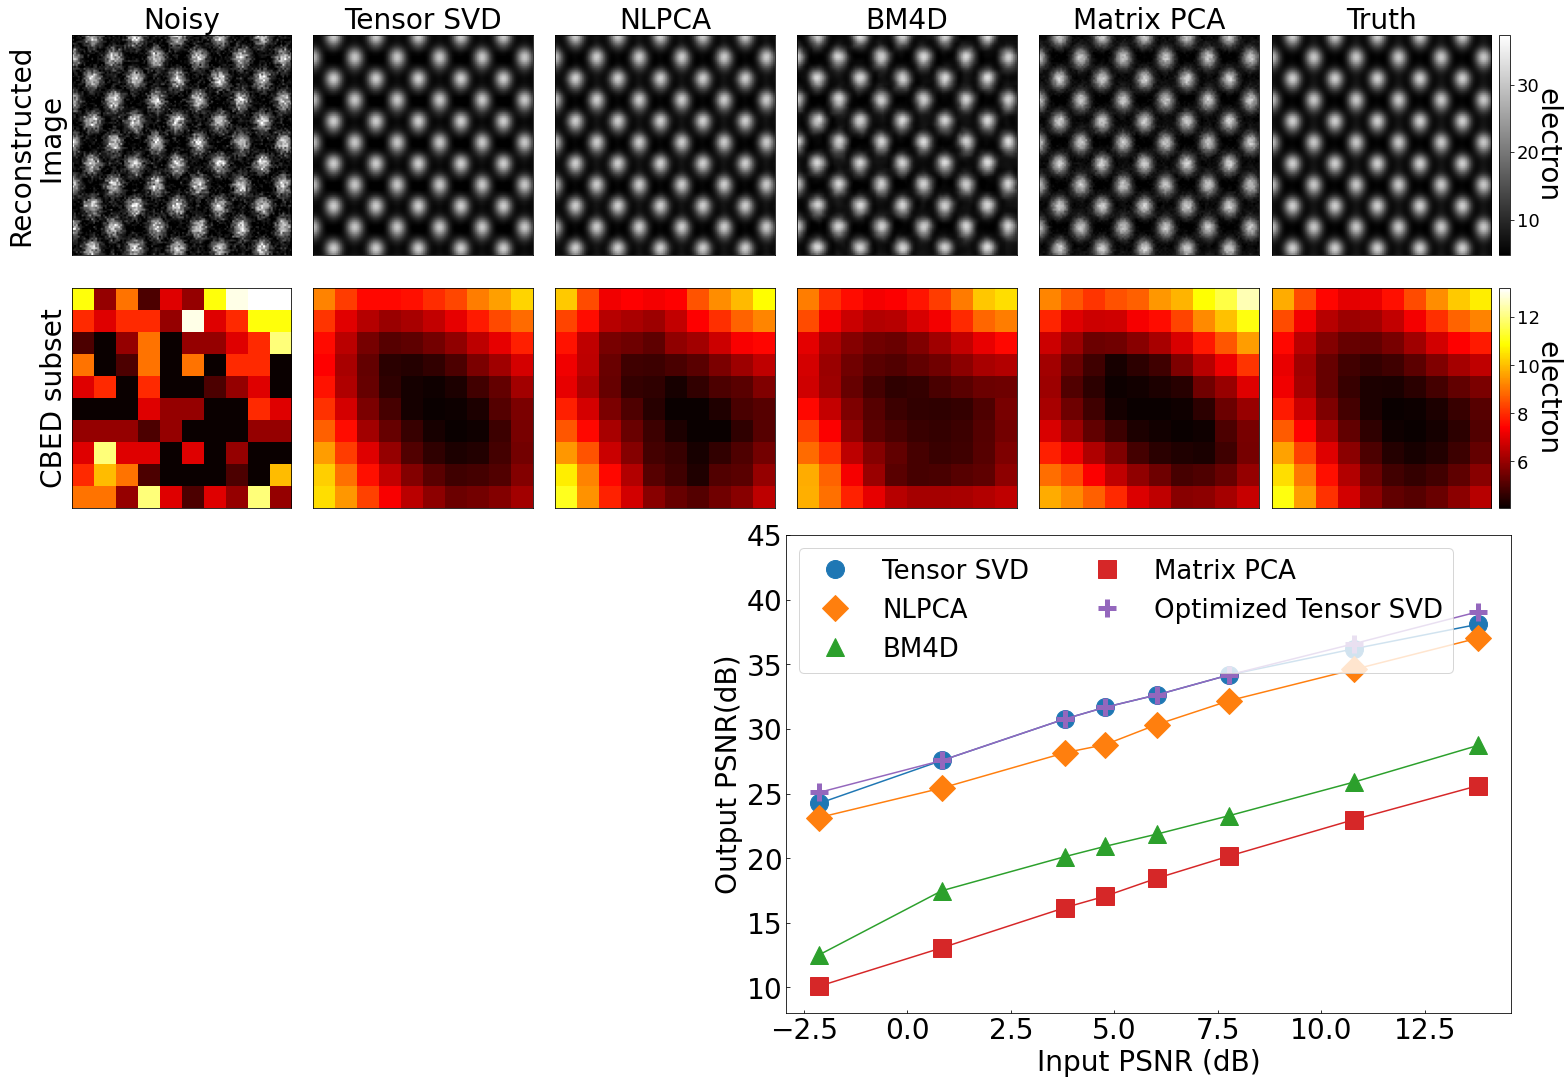

In [69]:
# overall plot
fig = plt.figure(figsize=(26,18))
iframe = 50
clim_low = np.amin(truth_data[:,:,iframe])
clim_high = np.amax(truth_data[:,:,iframe])


ax = fig.add_subplot(461)
plt.imshow(raw_data[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Noisy',fontsize=28)
plt.ylabel('Reconstructed\n Image', fontsize=28)
# ax.text(95,105,'a',fontsize=25, color='white', fontweight='bold')


ax = fig.add_subplot(462)
plt.imshow(tensor_denoised[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Tensor SVD',fontsize=28)
# ax.text(95,105,'b',fontsize=25, color='white', fontweight='bold')

ax = fig.add_subplot(463)
plt.imshow(NLPCA_denoised[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('NLPCA',fontsize=28)
# ax.text(95,105,'c',fontsize=25, color='white', fontweight='bold')

ax = fig.add_subplot(464)
plt.imshow(BM4D_denoised[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('BM4D',fontsize=28)
# ax.text(95,105,'d',fontsize=25, color='white', fontweight='bold')

ax = fig.add_subplot(465)
plt.imshow(PCA_denoised[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Matrix PCA',fontsize=28)

ax = fig.add_subplot(466)
im = ax.imshow(truth_data[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Truth',fontsize=28)
# ax.text(95,105,'e',fontsize=25, color='white', fontweight='bold')


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=18)
# cbar.set_label('$e^{-}$',rotation=270,fontsize=20, labelpad = 12)
cbar.set_label('electron',rotation=270,fontsize=28, labelpad = 22)

# plot subset of CBED patterns
rx = 50
ry = 50
clim_low = np.amin(truth_data[rx,ry,:])
clim_high = np.amax(truth_data[rx,ry,:])

ax = fig.add_subplot(467)
plt.imshow(raw_data[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
plt.ylabel('CBED subset', fontsize=28)
# ax.text(8,8,'f',fontsize=25, color='white', fontweight='bold')

ax = fig.add_subplot(468)
plt.imshow(tensor_denoised[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# ax.text(8,8,'g',fontsize=25, color='white', fontweight='bold')
# ax.text(0,8,'1.4 sec',fontsize=25, color='white', fontweight='bold')

ax = fig.add_subplot(469)
plt.imshow(NLPCA_denoised[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# ax.text(8,8,'h',fontsize=25, color='white', fontweight='bold')
# ax.text(0,8,'539.1 sec',fontsize=25, color='white', fontweight='bold')

ax = fig.add_subplot(4,6,10)
plt.imshow(BM4D_denoised[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# ax.text(8,8,'i',fontsize=25, color='white', fontweight='bold')
# ax.text(0,8,'249.5 sec',fontsize=25, color='white', fontweight='bold')
ax = fig.add_subplot(4,6,11)
im = plt.imshow(PCA_denoised[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(4,6,12)
im = plt.imshow(truth_data[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# ax.text(8,8,'j',fontsize=25, color='white', fontweight='bold')


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=18)
# cbar.set_label('$e^{-}$',rotation=270,fontsize=20, labelpad = 12)
cbar.set_label('electron',rotation=270,fontsize=28, labelpad = 22)

ax3 = plt.subplot2grid((6, 4), (3, 2), colspan=3, rowspan=3)
ax3.plot(PSNR_list[3,:], PSNR_list[0,:], 'o',markersize=18, mfc='#1f77b4', label = 'Tensor SVD')
ax3.plot(PSNR_list[3,:], PSNR_list[0,:], color = '#1f77b4')
ax3.plot(PSNR_list[3,:], PSNR_list[1,:], 'D',markersize=18, mfc='#ff7f0e', label = 'NLPCA')
ax3.plot(PSNR_list[3,:], PSNR_list[1,:], color ='#ff7f0e')
ax3.plot(PSNR_list[3,:], PSNR_list[2,:], '^',markersize=18, mfc='#2ca02c', label = 'BM4D')
ax3.plot(PSNR_list[3,:], PSNR_list[2,:], color='#2ca02c')
ax3.plot(PSNR_list[3,:], PSNR_list[5,:], 's',markersize=18, mfc='#d62728', label = 'Matrix PCA')
ax3.plot(PSNR_list[3,:], PSNR_list[5,:], color='#d62728')
ax3.plot(PSNR_list[3,:], PSNR_list[4,:], '+', markersize=18, mfc = '#9467bd', mew=5, label = 'Optimized Tensor SVD')
ax3.plot(PSNR_list[3,:], PSNR_list[4,:], color = '#9467bd')
plt.xlabel('Input PSNR (dB)',fontsize=28)
plt.ylabel('Output PSNR(dB)',fontsize=28)
plt.legend(fontsize=26, loc='upper left',ncol=2)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,fontsize=16)
ax3.tick_params(direction='in',labelsize = 28)
# plt.title('STO data', fontsize=24)
plt.ylim([8,45])

fig.subplots_adjust(wspace = 0.0, hspace = 0.15)
# fig.savefig('D:/2020/TensorSVD/ManuscriptRelated/Figures/FigureFromPython/STO_DiffMethods.tif')

# Si dislocation part

## Load raw data, denoised data, and truth

In [70]:
path = 'D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseOutput_cropped/SiDislocation/'

raw_data = sio.loadmat('D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseInput_cropped/\
SiDislocation/Simulation_noisy_SiDisl_slice_5_1000FPS_cropped_100layers.mat')
raw_data = raw_data['datacube']

truth_data = np.load('D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseInput_cropped/\
SiDislocation/Simulation_truth_SiDisl_slice_5_1000FPS_cropped_100layers.npy')

tensor_denoised = sio.loadmat(path + 'Simulation_tensor_SiDisl_slice_5_1000FPS_cropped_100layers.mat')
tensor_denoised = tensor_denoised['est_HOOI']

NLPCA_denoised = sio.loadmat(path + 'Simulation_NLPCA_SiDisl_slice_5_1000FPS_cropped_100layers.mat')
NLPCA_denoised = NLPCA_denoised['est_NLPCA']

BM4D_denoised = sio.loadmat(path + 'Simulation_BM4D_SiDisl_slice_5_1000FPS_cropped_100layers.mat')
BM4D_denoised = BM4D_denoised['est_BM4D']

PCA_denoised = path + 'Simulation_PCA_SiDisl_slice_5_1000FPS_cropped_100layers.npy'
PCA_denoised = np.load(PCA_denoised)

## Calculate PSNR for different methods under different frame rates

In [22]:
# Plot input vs output psnr
FPS_list = [1000,2000,4000,6000,8000,10000,20000,40000]
PSNR_list = np.zeros((6,len(FPS_list)))
path = 'D:/2020/TensorSVD/ManuscriptRelated/SimulationData/'
for i in range(len(FPS_list)):
    FPS = FPS_list[i]
    truth_file = path + 'DenoiseInput_cropped/SiDislocation/Simulation_truth_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers.npy'
    truth_file = np.load(truth_file)
    
    noisy_file = path + 'DenoiseInput_cropped/SiDislocation/Simulation_noisy_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    noisy_file = sio.loadmat(noisy_file)
    noisy_file = noisy_file['datacube']
    
    tensor_file = path + 'DenoiseOutput_cropped/SiDislocation/Simulation_tensor_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    tensor_file = sio.loadmat(tensor_file)
    tensor_file = tensor_file['est_HOOI']
    
    NLPCA_file = path + 'DenoiseOutput_cropped/SiDislocation/Simulation_NLPCA_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    NLPCA_file = sio.loadmat(NLPCA_file)
    NLPCA_file = NLPCA_file['est_NLPCA']
    
    BM4D_file = path + 'DenoiseOutput_cropped/SiDislocation/Simulation_BM4D_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    BM4D_file = sio.loadmat(BM4D_file)
    BM4D_file = BM4D_file['est_BM4D']
    
    tensor_file_optimized = path + 'DenoiseOutput_cropped/SiDislocation/Simulation_tensor_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers_optimized.mat'
    tensor_file_optimized = sio.loadmat(tensor_file_optimized)
    tensor_file_optimized = tensor_file_optimized['est_HOOI']
    
    PCA_file = path + 'DenoiseOutput_cropped/SiDislocation/Simulation_PCA_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers.npy'
    PCA_file = np.load(PCA_file)
    
    PSNR_list[0,i] = averagePSNR(tensor_file,truth_file,0)
    PSNR_list[1,i] = averagePSNR(NLPCA_file,truth_file,0)
    PSNR_list[2,i] = averagePSNR(BM4D_file,truth_file,0)
    PSNR_list[3,i] = averagePSNR(noisy_file,truth_file,0)
    PSNR_list[4,i] = averagePSNR(tensor_file_optimized,truth_file,0)
    PSNR_list[5,i] = averagePSNR(PCA_file, truth_file, 0)
    
    print(FPS)
    print(PSNR_list[:,i])
#     print(PSNR_list[1,i])

1000
[33.95978402 35.36467741 31.04233832 16.16721989 36.18514184 27.67357923]
2000
[32.6916904  34.17924556 28.48798326 13.15491758 33.74210757 25.24227428]
4000
[30.80684304 32.23305477 25.80646386 10.13553394 31.16712473 22.60408603]
6000
[29.12205185 31.21037893 24.28099329  8.38925833 29.74272417 20.92995567]
8000
[28.08569922 30.36828863 23.06305718  7.15457256 28.85180278 19.73638544]
10000
[27.15494943 29.47862375 22.10627018  6.18284758 28.18096126 18.79585442]
20000
[23.71148832 27.27251401 18.61178418  3.18723241 25.8144465  15.76975851]
40000
[20.45936746 25.06292066 13.54989496  0.20134993 23.53953569 12.72858957]


Text(0.5, 1.0, 'Si dislocation data')

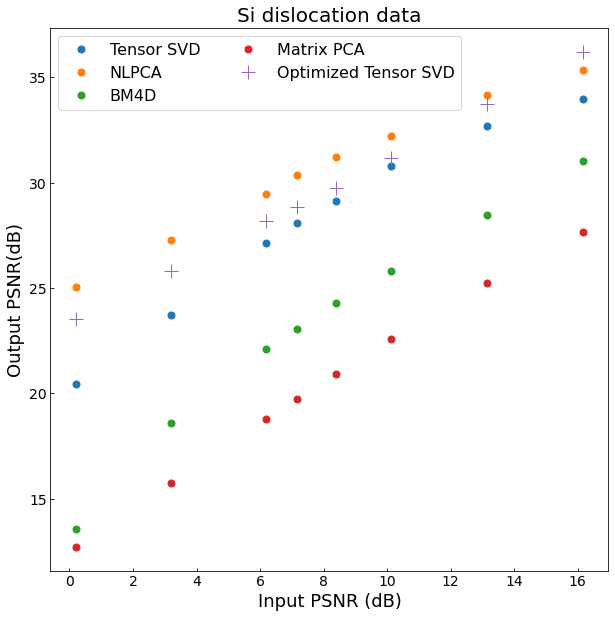

In [72]:
fig = plt.figure(figsize=(10,10))
ax3 = plt.subplot(111)
ax3.plot(PSNR_list[3,:], PSNR_list[0,:], '.',markersize=14, label = 'Tensor SVD')
ax3.plot(PSNR_list[3,:], PSNR_list[1,:], '.',markersize=14, label = 'NLPCA')
ax3.plot(PSNR_list[3,:], PSNR_list[2,:], '.',markersize=14, label = 'BM4D')
ax3.plot(PSNR_list[3,:], PSNR_list[5,:], '.',markersize=14, label = 'Matrix PCA')
ax3.plot(PSNR_list[3,:], PSNR_list[4,:], '+', markersize=14, label = 'Optimized Tensor SVD')
plt.xlabel('Input PSNR (dB)',fontsize=18)
plt.ylabel('Output PSNR(dB)',fontsize=18)
plt.legend(fontsize=16, loc='upper left',ncol=2)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,fontsize=16)
ax3.tick_params(direction='in',labelsize = 14)
plt.title('Si dislocation data', fontsize=20)
# ax3.text(15,17,'v',fontsize=45, color='black', fontweight='bold')
# ax3.text(6,17,'Si dislocation data denoise',fontsize=20, color='black')
# plt.ylim([15,40])

## Test different noise metrics, see if the same trend is observed
1. SSIM: using the function skimage.measure.compare_ssim
2. MSE: directly use mean square error in unit of intensity, without normalizing.

In [26]:
# Plot input vs output psnr
FPS_list = [1000,2000,4000,6000,8000,10000,20000,40000]
SSIM_list = np.zeros((6,len(FPS_list)))
path = 'D:/2020/TensorSVD/ManuscriptRelated/SimulationData/'
for i in range(len(FPS_list)):
    FPS = FPS_list[i]
    truth_file = path + 'DenoiseInput_cropped/SiDislocation/Simulation_truth_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers.npy'
    truth_file = np.load(truth_file)
    
    noisy_file = path + 'DenoiseInput_cropped/SiDislocation/Simulation_noisy_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    noisy_file = sio.loadmat(noisy_file)
    noisy_file = noisy_file['datacube']
    
    tensor_file = path + 'DenoiseOutput_cropped/SiDislocation/Simulation_tensor_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    tensor_file = sio.loadmat(tensor_file)
    tensor_file = tensor_file['est_HOOI']
    
    NLPCA_file = path + 'DenoiseOutput_cropped/SiDislocation/Simulation_NLPCA_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    NLPCA_file = sio.loadmat(NLPCA_file)
    NLPCA_file = NLPCA_file['est_NLPCA']
    
    BM4D_file = path + 'DenoiseOutput_cropped/SiDislocation/Simulation_BM4D_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    BM4D_file = sio.loadmat(BM4D_file)
    BM4D_file = BM4D_file['est_BM4D']
    
    tensor_file_optimized = path + 'DenoiseOutput_cropped/SiDislocation/Simulation_tensor_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers_optimized.mat'
    tensor_file_optimized = sio.loadmat(tensor_file_optimized)
    tensor_file_optimized = tensor_file_optimized['est_HOOI']
    
    PCA_file = path + 'DenoiseOutput_cropped/SiDislocation/Simulation_PCA_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers.npy'
    PCA_file = np.load(PCA_file)
    
    SSIM_list[0,i] = averageSSIM(tensor_file,truth_file)
    SSIM_list[1,i] = averageSSIM(NLPCA_file,truth_file)
    SSIM_list[2,i] = averageSSIM(BM4D_file,truth_file)
    SSIM_list[3,i] = averageSSIM(noisy_file,truth_file)
    SSIM_list[4,i] = averageSSIM(tensor_file_optimized, truth_file)
    SSIM_list[5,i] = averageSSIM(PCA_file, truth_file)

    
    print(FPS)
    print(SSIM_list[:,i])

C:\Users\Chenyu\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:14: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  
C:\Users\Chenyu\Anaconda3\lib\site-packages\skimage\measure\_structural_similarity.py:17: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  **kwargs)


1000
[0.98728975 0.98731257 0.97142304 0.59041064 0.99303622 0.95489299]
2000
[0.98425445 0.98388022 0.95193415 0.45121386 0.98838255 0.92683286]
4000
[0.97728418 0.97599553 0.91667518 0.31603026 0.97975104 0.88029001]
6000
[0.96779074 0.97024824 0.8893552  0.2472526  0.97265965 0.83805038]
8000
[0.96169251 0.96486694 0.86338097 0.20293361 0.96758234 0.80775811]
10000
[0.95186157 0.95844312 0.84089019 0.17410156 0.9630477  0.77549463]
20000
[0.90689525 0.9408956  0.7449281  0.10335307 0.94513358 0.66586659]
40000
[0.86482785 0.93373592 0.5594513  0.06280077 0.93402425 0.56584342]


Text(0.5, 1.0, 'Si Dislocation data')

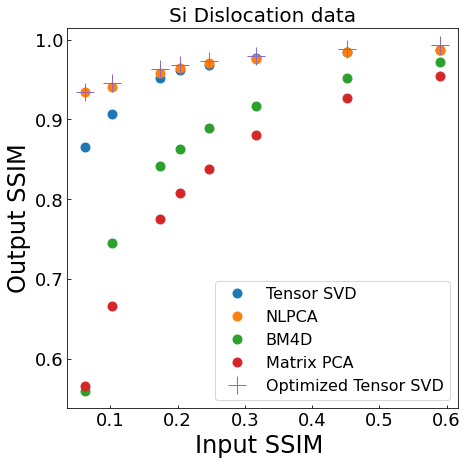

In [35]:
fig = plt.figure(figsize=(7,7))
ax3 = plt.subplot(111)
ax3.plot(SSIM_list[3,:], SSIM_list[0,:], '.',markersize=18, label = 'Tensor SVD')
ax3.plot(SSIM_list[3,:], SSIM_list[1,:], '.',markersize=18, label = 'NLPCA')
ax3.plot(SSIM_list[3,:], SSIM_list[2,:], '.',markersize=18, label = 'BM4D')
ax3.plot(SSIM_list[3,:], SSIM_list[5,:], '.',markersize=18, label = 'Matrix PCA')
ax3.plot(SSIM_list[3,:], SSIM_list[4,:], '+', markersize=18, label = 'Optimized Tensor SVD')
plt.xlabel('Input SSIM ',fontsize=24)
plt.ylabel('Output SSIM',fontsize=24)
plt.legend(fontsize=16, ncol=1)
ax3.tick_params(direction='in',labelsize = 18)
plt.title('Si Dislocation data', fontsize=20)

In [28]:
# Plot input vs output psnr
FPS_list = [1000,2000,4000,6000,8000,10000,20000,40000]
MSE_list = np.zeros((6,len(FPS_list)))
path = 'D:/2020/TensorSVD/ManuscriptRelated/SimulationData/'
for i in range(len(FPS_list)):
    FPS = FPS_list[i]
    truth_file = path + 'DenoiseInput_cropped/SiDislocation/Simulation_truth_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers.npy'
    truth_file = np.load(truth_file)
    
    noisy_file = path + 'DenoiseInput_cropped/SiDislocation/Simulation_noisy_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    noisy_file = sio.loadmat(noisy_file)
    noisy_file = noisy_file['datacube']
    
    tensor_file = path + 'DenoiseOutput_cropped/SiDislocation/Simulation_tensor_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    tensor_file = sio.loadmat(tensor_file)
    tensor_file = tensor_file['est_HOOI']
    
    NLPCA_file = path + 'DenoiseOutput_cropped/SiDislocation/Simulation_NLPCA_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    NLPCA_file = sio.loadmat(NLPCA_file)
    NLPCA_file = NLPCA_file['est_NLPCA']
    
    BM4D_file = path + 'DenoiseOutput_cropped/SiDislocation/Simulation_BM4D_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    BM4D_file = sio.loadmat(BM4D_file)
    BM4D_file = BM4D_file['est_BM4D']
    
    tensor_file_optimized = path + 'DenoiseOutput_cropped/SiDislocation/Simulation_tensor_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers_optimized.mat'
    tensor_file_optimized = sio.loadmat(tensor_file_optimized)
    tensor_file_optimized = tensor_file_optimized['est_HOOI']
    
    PCA_file = path + 'DenoiseOutput_cropped/SiDislocation/Simulation_PCA_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers.npy'
    PCA_file = np.load(PCA_file)
    
    MSE_list[0,i] = averageMSE(tensor_file,truth_file,0)
    MSE_list[1,i] = averageMSE(NLPCA_file,truth_file,0)
    MSE_list[2,i] = averageMSE(BM4D_file,truth_file,0)
    MSE_list[3,i] = averageMSE(noisy_file,truth_file,0)
    MSE_list[4,i] = averageMSE(tensor_file_optimized, truth_file,0)
    MSE_list[5,i] = averageMSE(PCA_file, truth_file,0)

    print(FPS)
    print(MSE_list[:,i])

1000
[ 0.28441409  0.29086534  0.46629566 13.74732061  0.15032141  1.10117393]
2000
[0.09136238 0.08600947 0.20978896 6.88105552 0.06650454 0.48794342]
4000
[0.03405762 0.02787028 0.0968858  3.44812044 0.03026486 0.22570179]
6000
[0.02216559 0.01507251 0.06103627 2.29314326 0.01891163 0.14951678]
8000
[0.01584469 0.01009453 0.04523153 1.71542989 0.01310362 0.11076779]
10000
[0.01264487 0.00764296 0.03606143 1.37427482 0.00988287 0.08841089]
20000
[0.00697708 0.00311961 0.02027696 0.6870897  0.00430088 0.04449978]
40000
[0.00370899 0.00126657 0.01711058 0.34400398 0.00183056 0.02252974]


Text(0.5, 1.0, 'Si Dislocation data')

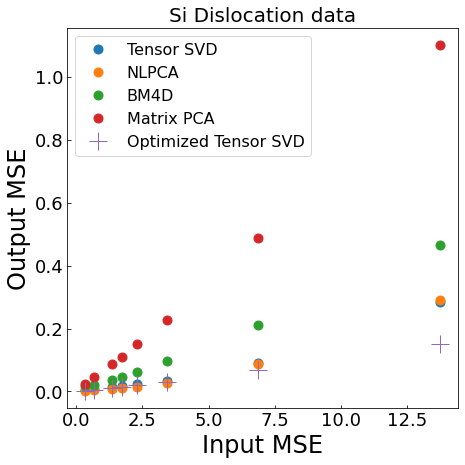

In [33]:
fig = plt.figure(figsize=(7,7))
ax3 = plt.subplot(111)
ax3.plot(MSE_list[3,:], MSE_list[0,:], '.',markersize=18, label = 'Tensor SVD')
ax3.plot(MSE_list[3,:], MSE_list[1,:], '.',markersize=18, label = 'NLPCA')
ax3.plot(MSE_list[3,:], MSE_list[2,:], '.',markersize=18, label = 'BM4D')
ax3.plot(MSE_list[3,:], MSE_list[5,:], '.',markersize=18, label = 'Matrix PCA')
ax3.plot(MSE_list[3,:], MSE_list[4,:], '+', markersize=18, label = 'Optimized Tensor SVD')
plt.xlabel('Input MSE',fontsize=24)
plt.ylabel('Output MSE',fontsize=24)
plt.legend(fontsize=16, ncol=1)
ax3.tick_params(direction='in',labelsize = 18)
plt.title('Si Dislocation data', fontsize=20)

## Plot for the manuscript

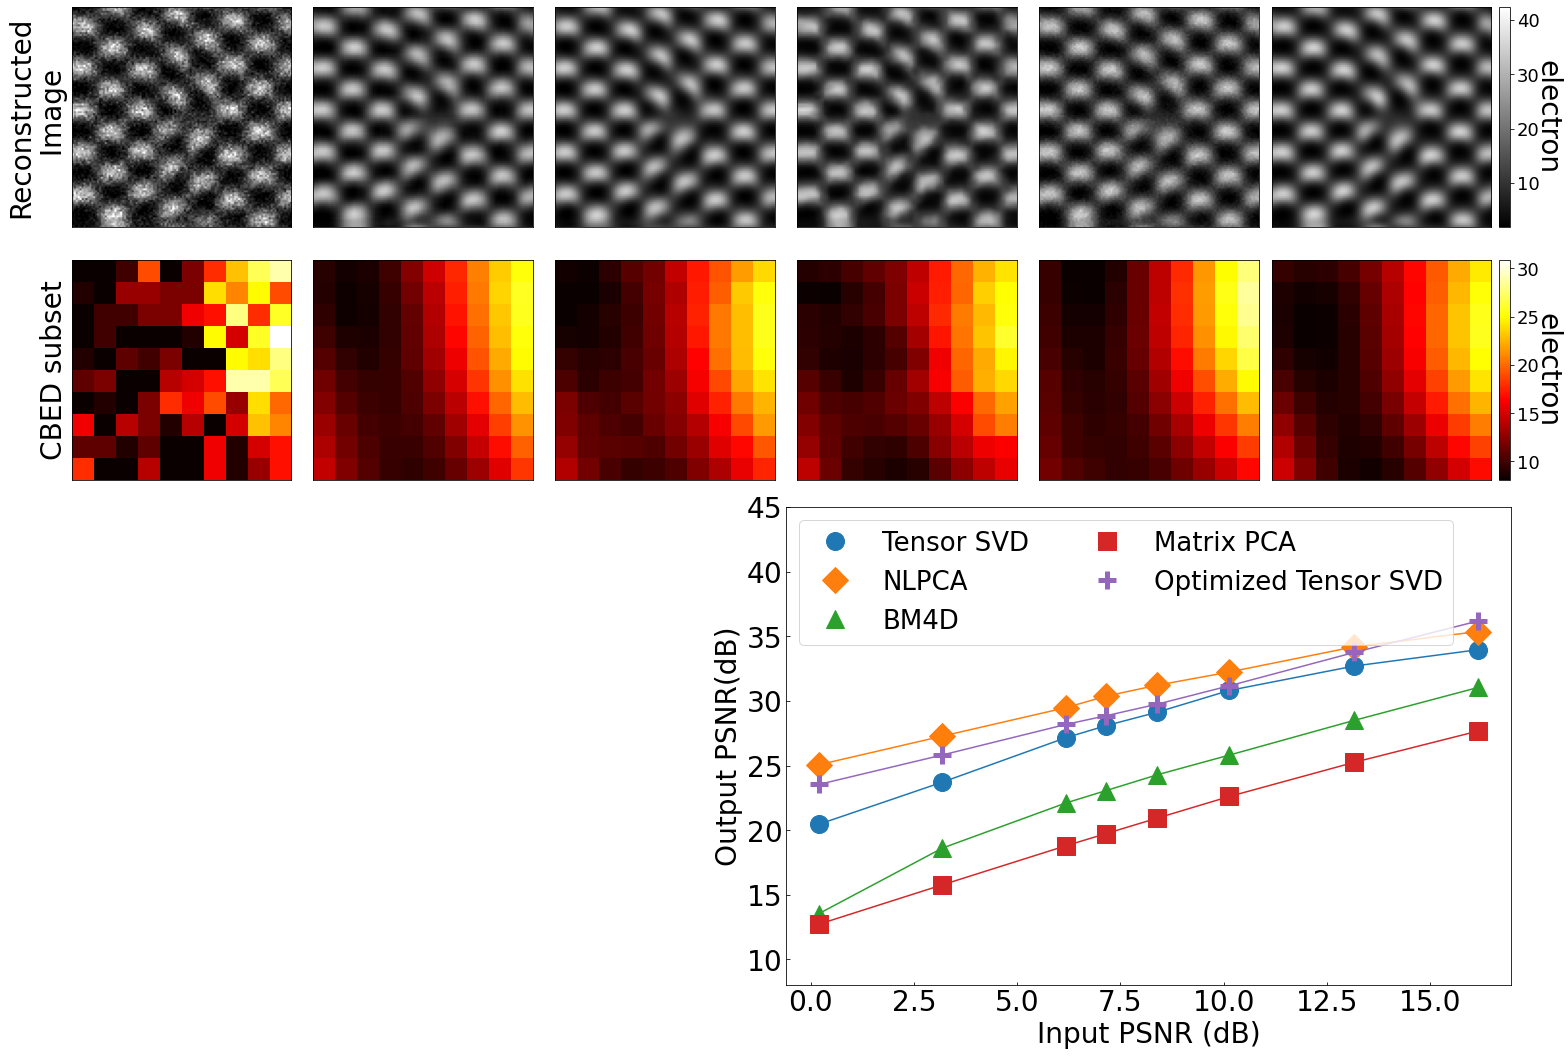

In [74]:
# overall plot
fig = plt.figure(figsize=(26,18))
iframe = 50
clim_low = np.amin(truth_data[:,:,iframe])
clim_high = np.amax(truth_data[:,:,iframe])


ax = fig.add_subplot(461)
plt.imshow(raw_data[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
# plt.title('Noisy',fontsize=28)
plt.ylabel('Reconstructed\n Image', fontsize=28)
# ax.text(95,105,'a',fontsize=25, color='white', fontweight='bold')


ax = fig.add_subplot(462)
plt.imshow(tensor_denoised[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
# plt.title('Tensor SVD',fontsize=28)
# ax.text(95,105,'b',fontsize=25, color='white', fontweight='bold')

ax = fig.add_subplot(463)
plt.imshow(NLPCA_denoised[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
# plt.title('NLPCA',fontsize=28)
# ax.text(95,105,'c',fontsize=25, color='white', fontweight='bold')

ax = fig.add_subplot(464)
plt.imshow(BM4D_denoised[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
# plt.title('BM4D',fontsize=28)
# ax.text(95,105,'d',fontsize=25, color='white', fontweight='bold')

ax = fig.add_subplot(465)
plt.imshow(PCA_denoised[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
# plt.title('Matrix PCA',fontsize=28)

ax = fig.add_subplot(466)
im = ax.imshow(truth_data[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
# plt.title('Truth',fontsize=28)
# ax.text(95,105,'e',fontsize=25, color='white', fontweight='bold')


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=18)
# cbar.set_label('$e^{-}$',rotation=270,fontsize=20, labelpad = 12)
cbar.set_label('electron',rotation=270,fontsize=28, labelpad = 22)

# plot subset of CBED patterns
rx = 50
ry = 50
clim_low = np.amin(truth_data[rx,ry,:])
clim_high = np.amax(truth_data[rx,ry,:])

ax = fig.add_subplot(467)
plt.imshow(raw_data[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
plt.ylabel('CBED subset', fontsize=28)
# ax.text(8,8,'f',fontsize=25, color='white', fontweight='bold')

ax = fig.add_subplot(468)
plt.imshow(tensor_denoised[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# ax.text(8,8,'g',fontsize=25, color='white', fontweight='bold')
# ax.text(0,8,'1.4 sec',fontsize=25, color='white', fontweight='bold')

ax = fig.add_subplot(469)
plt.imshow(NLPCA_denoised[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# ax.text(8,8,'h',fontsize=25, color='white', fontweight='bold')
# ax.text(0,8,'539.1 sec',fontsize=25, color='white', fontweight='bold')

ax = fig.add_subplot(4,6,10)
plt.imshow(BM4D_denoised[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# ax.text(8,8,'i',fontsize=25, color='white', fontweight='bold')
# ax.text(0,8,'249.5 sec',fontsize=25, color='white', fontweight='bold')
ax = fig.add_subplot(4,6,11)
im = plt.imshow(PCA_denoised[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(4,6,12)
im = plt.imshow(truth_data[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# ax.text(8,8,'j',fontsize=25, color='white', fontweight='bold')


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=18)
# cbar.set_label('$e^{-}$',rotation=270,fontsize=20, labelpad = 12)
cbar.set_label('electron',rotation=270,fontsize=28, labelpad = 22)

ax3 = plt.subplot2grid((6, 4), (3, 2), colspan=3, rowspan=3)
ax3.plot(PSNR_list[3,:], PSNR_list[0,:], 'o',markersize=18, mfc='#1f77b4', label = 'Tensor SVD')
ax3.plot(PSNR_list[3,:], PSNR_list[0,:], color = '#1f77b4')
ax3.plot(PSNR_list[3,:], PSNR_list[1,:], 'D',markersize=18, mfc='#ff7f0e', label = 'NLPCA')
ax3.plot(PSNR_list[3,:], PSNR_list[1,:], color ='#ff7f0e')
ax3.plot(PSNR_list[3,:], PSNR_list[2,:], '^',markersize=18, mfc='#2ca02c', label = 'BM4D')
ax3.plot(PSNR_list[3,:], PSNR_list[2,:], color='#2ca02c')
ax3.plot(PSNR_list[3,:], PSNR_list[5,:], 's',markersize=18, mfc='#d62728', label = 'Matrix PCA')
ax3.plot(PSNR_list[3,:], PSNR_list[5,:], color='#d62728')
ax3.plot(PSNR_list[3,:], PSNR_list[4,:], '+', markersize=18, mfc = '#9467bd', mew=5, label = 'Optimized Tensor SVD')
ax3.plot(PSNR_list[3,:], PSNR_list[4,:], color = '#9467bd')
plt.xlabel('Input PSNR (dB)',fontsize=28)
plt.ylabel('Output PSNR(dB)',fontsize=28)
plt.legend(fontsize=26, loc='upper left',ncol=2)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,fontsize=16)
ax3.tick_params(direction='in',labelsize = 28)
# plt.title('STO data', fontsize=24)
plt.ylim([8,45])

fig.subplots_adjust(wspace = 0.0, hspace = 0.15)
# fig.savefig('D:/2020/TensorSVD/ManuscriptRelated/Figures/FigureFromPython/SiDisl_DiffMethods.tif')

In [3]:
def psnr(truth, denoise):
    mse = np.mean( (truth - denoise) ** 2 )
    PIXEL_MAX = np.amax(truth)
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

In [4]:
# transpose_option = 1 for tensor denoised data, where first dimension is for rec space and need to be transposed to match simulation
# transpose_option = 0 for noisy data, third dimension is for rec space and no need to transpose
def averagePSNR(denoised_data,truth_data,transpose_option):
    nlayer = truth_data.shape[2]
    side = np.sqrt(nlayer)
    side = int(side)
    psnr_map = np.zeros((truth_data.shape[0],truth_data.shape[1]))
    for irow in range(truth_data.shape[0]):
        for icol in range(truth_data.shape[1]):
            truth = truth_data[irow,icol,:].reshape(side,side)
            if transpose_option == 1:
                denoise = np.transpose(denoised_data[:,irow,icol].reshape(side,side))
            else:
                denoise = denoised_data[irow,icol,:].reshape(side,side)
            psnr_map[irow,icol] = psnr(truth,denoise)
    return np.mean(psnr_map)

In [11]:
# calculate SSIM for each real space position, result in Decibel
from skimage import data, img_as_float
from skimage.measure import compare_ssim

def averageSSIM(denoised_data, truth_data):
    ssim_map = np.zeros((truth_data.shape[0],truth_data.shape[1]))
    nlayer = truth_data.shape[2]
    side = np.sqrt(nlayer)
    side = int(side)
    for irow in range(truth_data.shape[0]):
        for icol in range(truth_data.shape[1]):
            truth = truth_data[irow,icol,:].reshape(side,side)
            denoise = denoised_data[irow,icol,:].reshape(side,side)
            (score, diff) = compare_ssim(truth, denoise, full=True)
            ssim_map[irow,icol] = score
    return np.mean(ssim_map)

In [15]:
def averageMSE(denoised_data,truth_data,transpose_option):
    nlayer = truth_data.shape[2]
    side = np.sqrt(nlayer)
    side = int(side)
    mse_map = np.zeros((truth_data.shape[0],truth_data.shape[1]))
    for irow in range(truth_data.shape[0]):
        for icol in range(truth_data.shape[1]):
            truth = truth_data[irow,icol,:].reshape(side,side)
            if transpose_option == 1:
                denoise = np.transpose(denoised_data[:,irow,icol].reshape(side,side))
            else:
                denoise = denoised_data[irow,icol,:].reshape(side,side)
            mse_map[irow,icol] = np.mean( (truth - denoise) ** 2 )
    return np.mean(mse_map)